<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Web_Crawling/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EA%B8%B0%EB%B3%B8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 수집 (웹 크롤링)

### 기본적인 절차

In [ ]:
import requests # 1단계 get 함수
from bs4 import BeautifulSoup # 2단계 select 함수

##### 1단계 : 해당 페이지의 url 가져오기  

In [ ]:
url = 'https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query=%EC%BD%94%EB%A1%9C%EB%82%98+%ED%99%95%EC%A7%84%EC%9E%90'

resp = requests.get(url)
resp

# 200 : 서버가 승인을 해줘서 get를 성공함
# 403 : 실패

<Response [200]>

b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98 \xed\x99\x95\xec\xa7\x84\xec\x9e\x90 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98 \xed\x99\x95\xec\xa7\x84\xec\x9e\x90\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98 \xed\x99\x95\xec\xa7\x84\xec\x9e\x90\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4
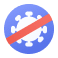
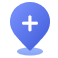
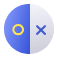
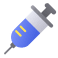
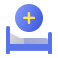

In [ ]:
# HTML 원본 소스 (binary 형식) -> 웹페이지 정보
resp.content

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="코로나 확진자 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'코로나 확진자\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'코로나 확진자\'의 네이버 뉴스검색 결과입니다."> <title>코로나 확진자 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220324.css"> <link rel="stylesheet" type
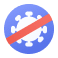
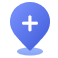
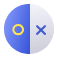
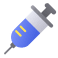
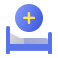

In [ ]:
# TML 원본 소스 -> text 디코딩 (가독성 좋음)
resp.text

###### 2단계 : HTML에서 내가 원하는 정보만 가져오기

In [ ]:
# HTML -> BeautifulSoup 형으로 형 변환 (select 함수를 사용하기 위해서)
soup = BeautifulSoup(resp.content,
                     'lxml') # parser 지정 : lxml이라는 parser program 지정
# parser : 전체에서 부분만 고르는 행위 -> 파싱 (select)

# 파싱 기법 
# 1. lxml -> 가장 효율적임
# 2. html5lib
# 3. html.parser

In [ ]:
soup.select('a.news_tit') # 이름 + 속성 or 계층구조 입력

[<a class="news_tit" href="https://news.jtbc.joins.com/article/article.aspx?news_id=NB12053083" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=08138260_000000000000000000294034&amp;g=437.0000294034&amp;u='+urlencode(this.href));" target="_blank" title="오늘부터 코로나 확진자도 동네 병·의원서 대면진료 가능">오늘부터 <mark>코로나 확진자</mark>도 동네 병·의원서 대면진료 가능</a>,
 <a class="news_tit" href="http://news.tvchosun.com/site/data/html_dir/2022/03/30/2022033090011.html" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=6&amp;i=88156f73_000000000000000000355049&amp;g=448.0000355049&amp;u='+urlencode(this.href));" target="_blank" title='오늘부터 확진자도 동네병원서 대면진료…"일상 의료체계 전환"'>오늘부터 <mark>확진자</mark>도 동네병원서 대면진료…"일상 의료체계 전환"</a>,
 <a class="news_tit" href="https://www.ytn.co.kr/_ln/0103_202203300433454113" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=11&amp;i=880000AF_000000000000000001719674&amp;g=052.0001719674&amp;u='+urlencode(this.href));" target="_blank" title="[단독] 코로나 검사도 안 받았는데 확진자로...'병원 실수'라지만">[단독] <mar

In [ ]:
# 태그 안에서 기사 정보 제목 정보 가져오기
a_tags = soup.select('a.news_tit') 

print(len(a_tags))
print(a_tags[0]['title'])

10
오늘부터 코로나 확진자도 동네 병·의원서 대면진료 가능


In [ ]:
# 한 페이지에 있는 모든 뉴스 기사 제목 가져오기

titles = []

for a_tag in a_tags:
  titles.append(a_tag['title'])

titles

['오늘부터 코로나 확진자도 동네 병·의원서 대면진료 가능',
 '오늘부터 확진자도 동네병원서 대면진료…"일상 의료체계 전환"',
 "[단독] 코로나 검사도 안 받았는데 확진자로...'병원 실수'라지만",
 '정부 "요양병원에 코로나 치료제 최우선 처방"',
 '고용부, 코로나19 확진자 급증시 中企 가이드 배포',
 '확진자 외래진료센터 늘어난다…내일부터 5∼11세 백신접종도',
 'WHO “한국, 4주 연속 코로나19 신규 확진자 가장 많아”',
 "코로나 신규 확진 42만4641명… 위중증 1301명 '역대 최다'",
 '오후 6시까지 전국서 24만83명 코로나19 확진…8만5358명↓',
 '가득 쌓인 코로나19 검체']

In [ ]:
# 태그 안에 기사 제목과 기사 링크를 
# 하나의 딕셔너리에 저장해보세요.

titles = {
    '제목':[],
    '링크':[]
}

for a_tag in a_tags:
  titles['링크'].append(a_tag['href'])
  titles['제목'].append(a_tag['title'])

titles

{'링크': ['https://news.jtbc.joins.com/article/article.aspx?news_id=NB12053083',
  'http://news.tvchosun.com/site/data/html_dir/2022/03/30/2022033090011.html',
  'https://www.ytn.co.kr/_ln/0103_202203300433454113',
  'http://www.newsis.com/view/?id=NISX20220330_0001813576&cID=10201&pID=10200',
  'http://www.newsis.com/view/?id=NISX20220330_0001813179&cID=10201&pID=10200',
  'http://yna.kr/AKR20220329041400530?did=1195m',
  'https://biz.chosun.com/international/international_general/2022/03/30/PW4SB5KFBBDJ5O6XEE3YLJ2W54/?utm_source=naver&utm_medium=original&utm_campaign=biz',
  'https://health.chosun.com/site/data/html_dir/2022/03/30/2022033000998.html',
  'https://view.asiae.co.kr/article/2022033019174794631',
  'http://www.newsis.com/view/?id=NISI20220330_0018650725'],
 '제목': ['오늘부터 코로나 확진자도 동네 병·의원서 대면진료 가능',
  '오늘부터 확진자도 동네병원서 대면진료…"일상 의료체계 전환"',
  "[단독] 코로나 검사도 안 받았는데 확진자로...'병원 실수'라지만",
  '정부 "요양병원에 코로나 치료제 최우선 처방"',
  '고용부, 코로나19 확진자 급증시 中企 가이드 배포',
  '확진자 외래진료센터 늘어난다…내일부터 5∼11세 백신

### 네이버에 '코로나 확진자' 연관 검색어 웹 크롤링

##### 1단계


In [ ]:
import requests 
from bs4 import BeautifulSoup 

url = 'https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query=%EC%BD%94%EB%A1%9C%EB%82%98+%ED%99%95%EC%A7%84%EC%9E%90'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')

##### 2단계

In [ ]:
related_word = soup.select('div.tit')

related_list = []


for related in related_word:
  related_list.append(related.get_text())

related_list

['코로나 실시간 확진자',
 '코로나 확진자 지원금',
 '19코로나 확진자',
 '코로나 확진자 격리기간',
 '오늘 코로나 확진자수',
 '코로나 누적 확진자',
 '코로나 확진자 가족',
 '코로나 확진자 생활지원금',
 '코로나 확진자 격리',
 '전세계 코로나 확진자']

### 네이버 웹툰의 제목, 작가, 평점을 csv파일로 저장

In [ ]:
import requests 
from bs4 import BeautifulSoup 

# 웹툰 정보를 담을 딕셔너리 생성
webtoon_info = {
        '제목' : [],
        '작가' : [],
        '평점' : [],
        '요일' : []
    }

# 요일별 웹툰 정보를 수집하기 위한 요일 정보 리스트
week_list = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

for week in week_list: # 요일별 크로링
    # 1단계
    url = 'https://comic.naver.com/webtoon/weekdayList?week=' + week

    resp = requests.get(url)
    resp
    # 2단계
    soup = BeautifulSoup(resp.content, 'lxml')
    
    # 제목, 작가, 평점
    tit_tags = soup.select('ul.img_list li dl dt a')
    aut_tags = soup.select('ul.img_list li dl dd.desc a')
    rat_tags = soup.select('ul.img_list li dl dd div.rating_type strong')
    
    # 딕셔너리에 저장
    for tit_tag, aut_tag, rat_tag in zip(tit_tags, aut_tags, rat_tags):
      webtoon_info['제목'].append(tit_tag['title'])
      webtoon_info['작가'].append(aut_tag.text)
      webtoon_info['평점'].append(rat_tag.text)
      webtoon_info['요일'].append(week)

In [ ]:
# 딕셔너리를 데이터프레임으로 변환
import pandas as pd

df_webtoon = pd.DataFrame(webtoon_info)
df_webtoon

,제목,작가,평점,요일
0,참교육,채용택 / 한가람,9.83,mon
1,쇼미더럭키짱!,박태준 / 김성모,9.39,mon
2,신의 탑,SIU,9.91,mon
3,뷰티풀 군바리,설이 / 윤성원,9.81,mon
4,퀘스트지상주의,박태준 만화회사,9.68,mon
...,...,...,...,...
524,푸른불꽃,닺,9.83,sun
525,다시 또 봄,이힝,9.91,sun
526,제타,하지,9.78,sun
527,짝사랑의 유서,군밤,9.90,sun


### 네이버 웹툰 요일별 평점의 평균과 중앙값 출력

In [ ]:
# 평점을 float형으로 변환
df_webtoon['평점'] = df_webtoon['평점'].astype('float')

# 요일별 평균
mean_by_week = df_webtoon.groupby('요일').mean()
mean_by_week.sort_values('평점', ascending=False, inplace=True) # 평점 내림차순

# 요일별 중앙값
median_by_week = df_webtoon.groupby('요일').median()
median_by_week.sort_values('평점', ascending=False, inplace=True)

In [ ]:
mean_by_week

,평점
요일,
mon,9.838904
wed,9.829178
sun,9.827013
tue,9.811974
sat,9.770909
fri,9.746533
thu,9.710256


In [ ]:
median_by_week

,평점
요일,
fri,9.930
sat,9.920
tue,9.915
sun,9.910
mon,9.900
thu,9.900
wed,9.890


### 네이버 웹툰 장르별 평점 평균과 중앙값 출력

In [ ]:
import requests 
from bs4 import BeautifulSoup 

genre_urls = [] # 장르별 URL 리스트
genre_names = [] # 장르 이름 리스트

url = 'https://comic.naver.com/webtoon/genre?genre=fantasy'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')

# 에피소드 옵니버스 스토리를 제외한 장르 이름 
genre_tags = soup.select('ul.spot li a')[3:]

for genre_tag in genre_tags:
    genre_urls.append(genre_tag['href'])
    genre_names.append(genre_tag.text)

genre_urls, genre_names

(['/webtoon/genre?genre=daily',
  '/webtoon/genre?genre=comic',
  '/webtoon/genre?genre=fantasy',
  '/webtoon/genre?genre=action',
  '/webtoon/genre?genre=drama',
  '/webtoon/genre?genre=pure',
  '/webtoon/genre?genre=sensibility',
  '/webtoon/genre?genre=thrill',
  '/webtoon/genre?genre=historical',
  '/webtoon/genre?genre=sports'],
 ['일상', '개그', '판타지', '액션', '드라마', '순정', '감성', '스릴러', '무협/사극', '스포츠'])

In [ ]:
# 반복문 진행상황 알림
from tqdm.notebook import tqdm

In [ ]:
# 장르별 웹툰 정보를 담을 딕셔너리
webtoon_info = {
        '제목' : [],
        '작가' : [],
        '평점' : [],
        '장르' : []
    }

# 네이버 웹툰 주소에 장르별 URL 호출
for i in tqdm(range(len(genre_urls))):

    # 1단계
    url = 'https://comic.naver.com' + genre_urls[i]

    resp = requests.get(url)

    # 2단계
    soup = BeautifulSoup(resp.content, 'lxml')

    # 제목, 작가, 평점
    tit_tags = soup.select('ul.img_list li dl dt a')
    aut_tags = soup.select('ul.img_list li dl dd.desc a')
    rat_tags = soup.select('ul.img_list li dl dd div.rating_type strong')

    # 수집한 정보를 딕셔너리에 저장
    for tit_tag, aut_tag, rat_tag in zip(tit_tags, aut_tags, rat_tags):
        webtoon_info['제목'].append(tit_tag['title'])
        webtoon_info['작가'].append(aut_tag.text)
        webtoon_info['평점'].append(float(rat_tag.text))
        webtoon_info['장르'].append(genre_names[i])

# 딕셔너리를 데이터프레임으로 변환
df_webtoon = pd.DataFrame(webtoon_info)
df_webtoon

  0%|          | 0/10 [00:00<?, ?it/s]

,제목,작가,평점,장르
0,독립일기,자까,9.97,일상
1,대학원 탈출일지,요다,9.97,일상
2,먹는 인생,홍끼,9.96,일상
3,윌유메리미,마인드C,9.92,일상
4,오빠세끼,올리브유,9.77,일상
...,...,...,...,...
1769,불릿 6미리,김도근,9.89,스포츠
1770,미드나잇 체이서,석재윤,9.60,스포츠
1771,번데기스,김경호,7.97,스포츠
1772,리턴,송래현,9.85,스포츠


In [ ]:
# 장르별 평점 평균
df_webtoon

,평점
장르,
감성,9.895000
무협/사극,9.859231
순정,9.771181
드라마,9.748030
스릴러,9.746606
판타지,9.717264
일상,9.651067
개그,9.646119
스포츠,9.548261


In [ ]:
# 장르별 평점 중앙값
df_webtoon.groupby('장르').median().sort_values('평점', ascending=False)

,평점
장르,
감성,9.930
순정,9.920
드라마,9.910
무협/사극,9.910
판타지,9.910
개그,9.900
스릴러,9.900
일상,9.890
액션,9.835


### 네이버에서 '카카오'를 검색한 기사 1000개 제목과 링크를 딕셔너리로 저장

In [ ]:
import requests 
from bs4 import BeautifulSoup 
from tqdm.notebook import tqdm

# 카카오 기사 정보 딕셔너리
news_info = {
    '제목' : [],
    '링크' : []
}

# 페이지 번호 : 1, 11, 21, 31, 41...
for page in tqdm(range(1, 101)):
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%B9%B4%EC%B9%B4%EC%98%A4&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=145&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='
    start = (page - 1)*10 + 1

    # 1단계
    url = url + str(start)
    resp = requests.get(url)

    # 2단계
    soup = BeautifulSoup(resp.content, 'lxml')
    a_tags = soup.select('a.news_tit')

    for a_tag in a_tags:
        news_info['제목'].append(a_tag['title'])
        news_info['링크'].append(a_tag['href'])

print(len(news_info['제목']))
print(len(news_info['링크']))

  0%|          | 0/100 [00:00<?, ?it/s]

1000
1000


### 네이버 웹툰의 섬네일 이미지를 저장 (img / scr)

In [ ]:
from tqdm.notebook import tqdm
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/weekday'

# 1단계
resp = requests.get(url)

# 2단계
soup = BeautifulSoup(resp.content, 'lxml')

img_tags = soup.select('div.thumb a img')

for i, img_tag in tqdm(enumerate(img_tags)):
    # 30번만 반복
    if  i == 30:
      break

    # 섬네일 웹툰 제목
    title = img_tag['title']

    # 섬네일 태그에서 'src'를 'get'함수로 가져오기
    img = requests.get(img_tag['src'])

0it [00:00, ?it/s]

In [ ]:
 # with open (A, B) as f:  # A: 파일 이름 B: 입출력 방식

In [ ]:
# 형식지정 출력 1 : img_번호.jpg로 저장 (단, 번호 자릿수는 3자리 : 001, 002. 003)
with open('img_{:03}.jpg'.format(idx), 'wb') as f: 
  f.write(img.content)

In [ ]:
# 형식지정 출력 2 : thumb_제목.jpg로 저장
with open('thumb_{}.jpg'.format(title), 'wb') as f:
  f.write(img.content)

In [ ]:
import requests 
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

# KOSPI200 일별 시세 정보 딕셔너리
kospi200_info = {
    '날짜' : [],
    '체결가' : [],
    '전일비' : [],
    '등락률' : [],
    '거래량' : [],
    '거래대금' : []
}

## 맨 끝페이지 정보 얻어오기
url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page=1'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')

lst_url = soup.select('td.pgRR a')[0]['href']
lst_pg = int(lst_url.split('=')[-1])

### 네이버 금융에서 KOSIP200에서 일별 시세 데이터 가져오기 (iframe)

In [ ]:
for i in tqdm(range(lst_pg), desc='kospi200'):

    page = i+1
    url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page=' + str(page)
    # 1단계
    resp = requests.get(url)
    # 2단계
    soup = BeautifulSoup(resp.content, 'lxml')

    # 체결가, 등락률, 거래량, 거래대금 태그
    n1_tags = soup.select('td.number_1')

    # 날짜 태그
    date_tags = soup.select('td.date')

    # 전일비 태그
    diff_tags = soup.select('td.rate_down span')
    
    # 체결가, 등락률, 거래량, 거래대금 태그
    n1_tags = soup.select('td.number_1')

    price_tags = n1_tags[::4] # 체결가
    rate_tags = n1_tags[1::4] # 등락률
    volume_tags = n1_tags[2::4] # 거래량
    amount_tags = n1_tags[3::4] # 거래대금

    # 마지막 페이지에는 6개가 아닌 5개의 데이터만 존재하기에 반복을 데이터 갯수만큼 실행
    for i in range(len(diff_tags)):
        # 전일비에 부호 부여
        sign = ''
        
        # 그림이 파랑색이면 '-' 부호를 부여
        # 그 외의 색은 그래도 출력 
        if diff_tags[i]['class'][-1] == 'nv01':
            sign = '-'

        kospi200_info['날짜'].append(date_tags[i].text)
        kospi200_info['체결가'].append(price_tags[i].text)
        kospi200_info['전일비'].append(sign + diff_tags[i].text.strip())
        kospi200_info['등락률'].append(rate_tags[i].text.strip())
        kospi200_info['거래량'].append(volume_tags[i].text)
        kospi200_info['거래대금'].append(amount_tags[i].text)

kospi200:   0%|          | 0/670 [00:00<?, ?it/s]

In [ ]:
# 딕셔너리를 데이터 프레임으로 변환
import pandas as pd
df_kospi200 = pd.DataFrame(kospi200_info)

In [ ]:
df_kospi200.tail()

,날짜,체결가,전일비,등락률,거래량,거래대금
4012,2006.01.09,180.30,-0.57,-0.32%,"191,222","4,641,279"
4013,2006.01.06,180.87,2.05,+1.15%,"206,313","4,609,858"
4014,2006.01.05,178.82,-1.09,-0.61%,"206,332","5,522,148"
4015,2006.01.04,179.91,1.10,+0.62%,"188,841","5,360,812"
4016,2006.01.03,178.81,0.52,+0.29%,"158,041","4,161,549"


In [ ]:
# 날짜를 datetime 타입으로 변환
df_kospi200['날짜'] = pd.to_datetime(df_kospi200['날짜'])

# 체결가, 등락륙, 거래량, 거래대금을 float로 변환
df_kospi200['체결가'] = pd.to_numeric(df_kospi200['체결가'])
df_kospi200['전일비'] = pd.to_numeric(df_kospi200['전일비'])

df_kospi200['등락률'] = df_kospi200['등락률'].str.replace('%', '')
df_kospi200['등락률'] = pd.to_numeric(df_kospi200['등락률'])


df_kospi200['거래량'] = df_kospi200['거래량'].str.replace(',', '')
df_kospi200['거래량'] = pd.to_numeric(df_kospi200['거래량'])

df_kospi200['거래대금'] = df_kospi200['거래대금'].str.replace(',', '')
df_kospi200['거래대금'] = pd.to_numeric(df_kospi200['거래대금'])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


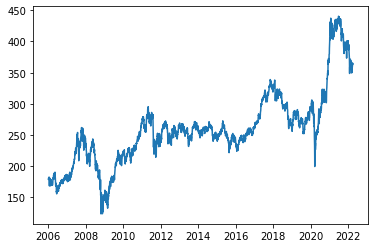

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# X축은 날짜 / Y축은 체결가 그래프
plt.plot(df_kospi200['날짜'], df_kospi200['체결가'])